In [132]:
import numpy
import pandas as pd
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
top_jobs = 3
top_skills = 5

In [133]:
top_three = df['job_title_short'].value_counts().head(top_jobs)
top_three_list = list(top_three.index)
top_three_dict = { top_three_list[x]: int(list(top_three.values)[x]) for x in range(len(top_three_list))}


In [134]:
df = df.explode('job_skills')
df_organized = df.groupby(['job_title_short', 'job_skills']).size().reset_index(name='skill_count')


In [135]:
df_organized = df_organized.sort_values(by='skill_count', ascending=False)

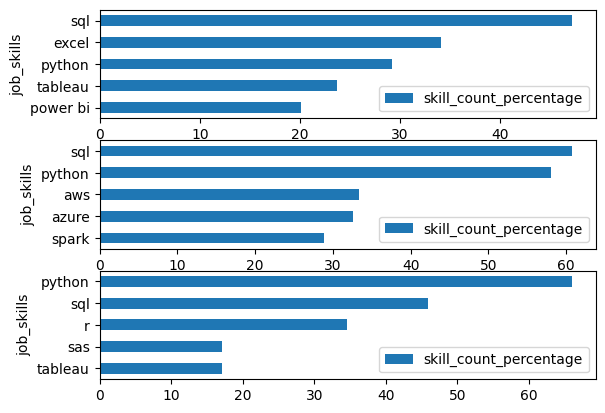

In [136]:
fig, ax = plt.subplots(len(top_three_list), 1)
i = 0
for job in top_three_list:
    df_skill_count = df_organized[df_organized['job_title_short'] == job].head(top_skills)
    df_skill_count['skill_count_percentage'] = df_skill_count['skill_count'].apply(lambda x: 100 * x / top_three_dict[job])
    df_skill_count.plot(kind='barh', x='job_skills', y='skill_count_percentage', ax=ax[i])
    ax[i].invert_yaxis()
    i = i + 1